In [67]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from constants import *

plt.style.use('ggplot')
sns.set_palette('Set2')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 0000 EDA
データ探索

## 0. データ確認

In [68]:
train = pd.read_csv(os.path.join(RAW_PATH, 'train.csv'), index_col=0)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [70]:
test = pd.read_csv(os.path.join(RAW_PATH, 'test.csv'), index_col=0)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [71]:
data = pd.concat([train, test], axis=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [73]:
target = train['SalePrice']

### 0.1 目的変数の分布を確認

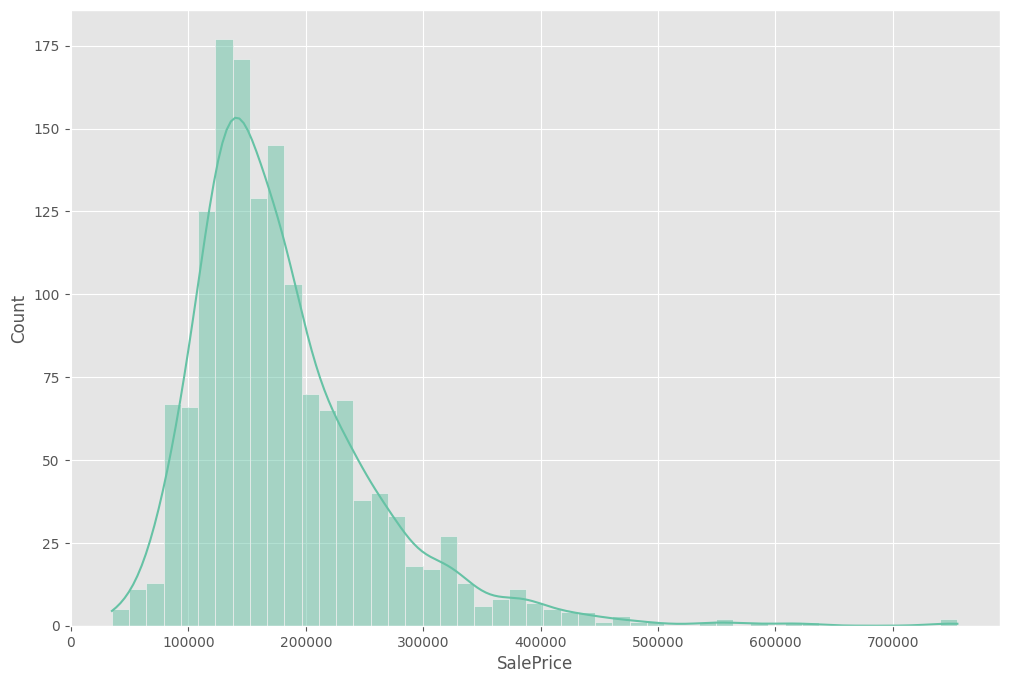

In [74]:
plt.figure(figsize=(12,8))
sns.histplot(target, kde=True)
plt.savefig(os.path.join(IMAGE_PATH, '00_target_scatter.png'))
plt.show()

### 0.2 対数変換
右に裾が長いならまずは対数変換（0以下もないし）

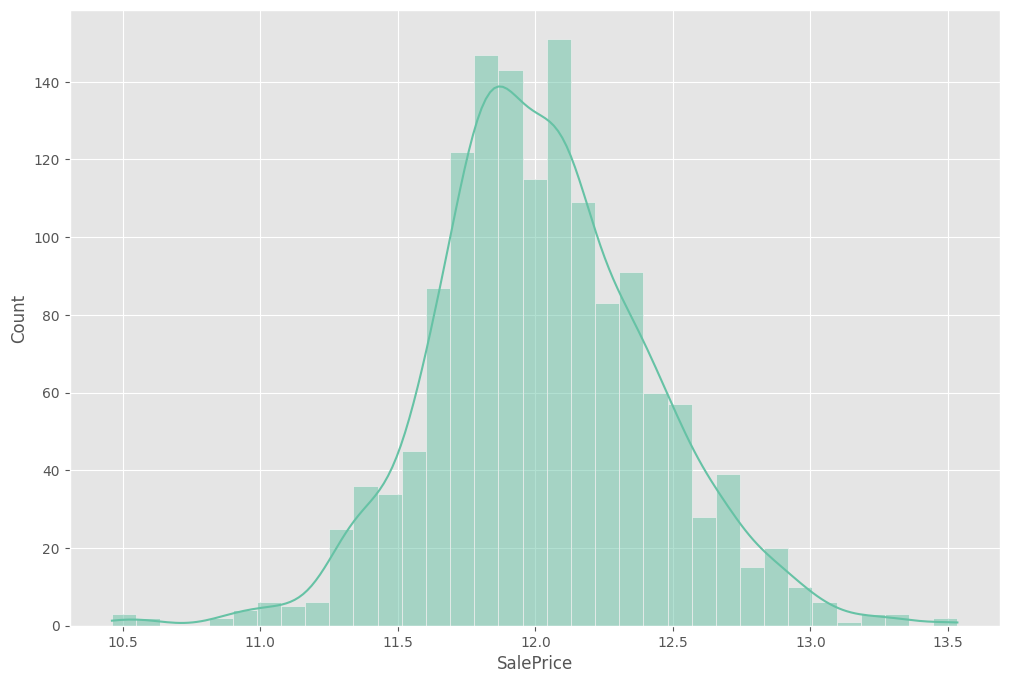

In [75]:
target_log = np.log(target)
plt.figure(figsize=(12,8))
sns.histplot(target_log, kde=True)
plt.savefig(os.path.join(IMAGE_PATH, '01_target_log_scatter.png'))
plt.show()

#### 歪度・尖度確認

In [76]:
target_log.skew(), target_log.kurtosis()

(np.float64(0.12133506220520406), np.float64(0.8095319958036296))

In [77]:
train['log_price'] = np.log(train['SalePrice'])

## 1 特徴量エンジニアリング
ヒートマップやペアプロットで可視化

In [78]:
significant_cols = [
    'OverallQual', 'OverallCond','ExterQual', 'ExterCond',
    'LotArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea',
    'YearBuilt', 'YearRemodAdd',
    'SalePrice', 'log_price'
    ] 

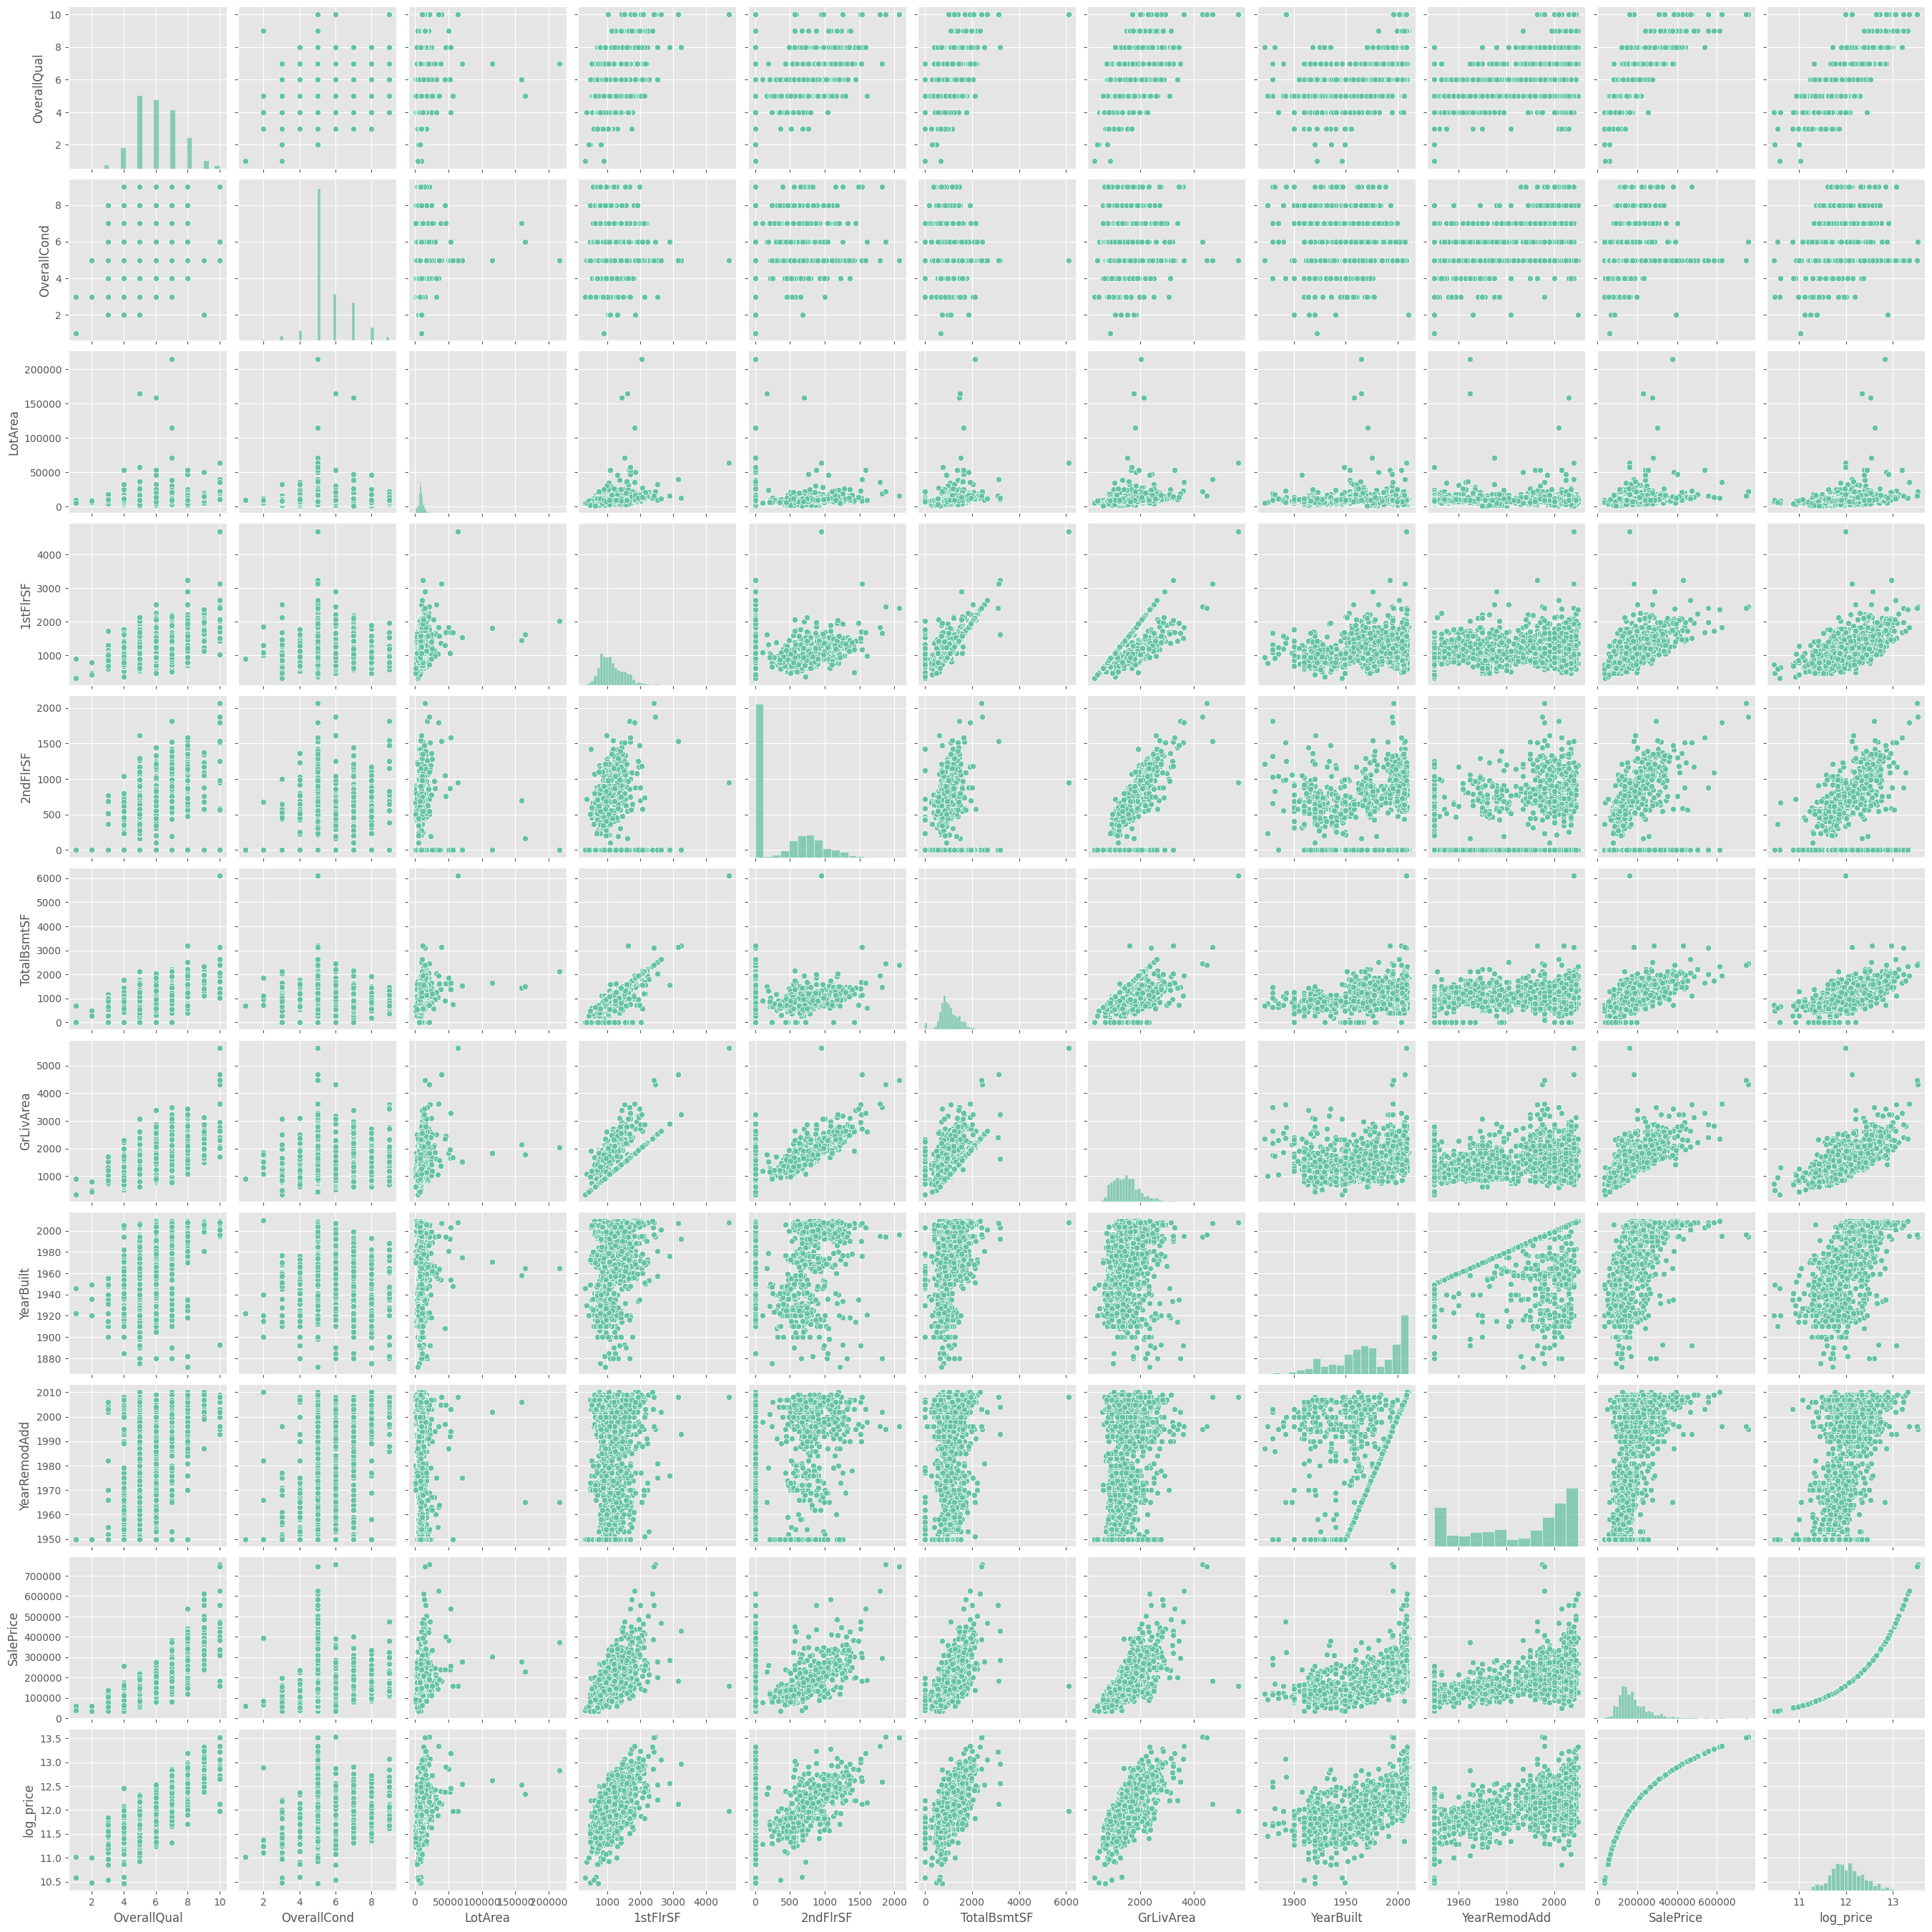

In [79]:
sns.pairplot(train[significant_cols])

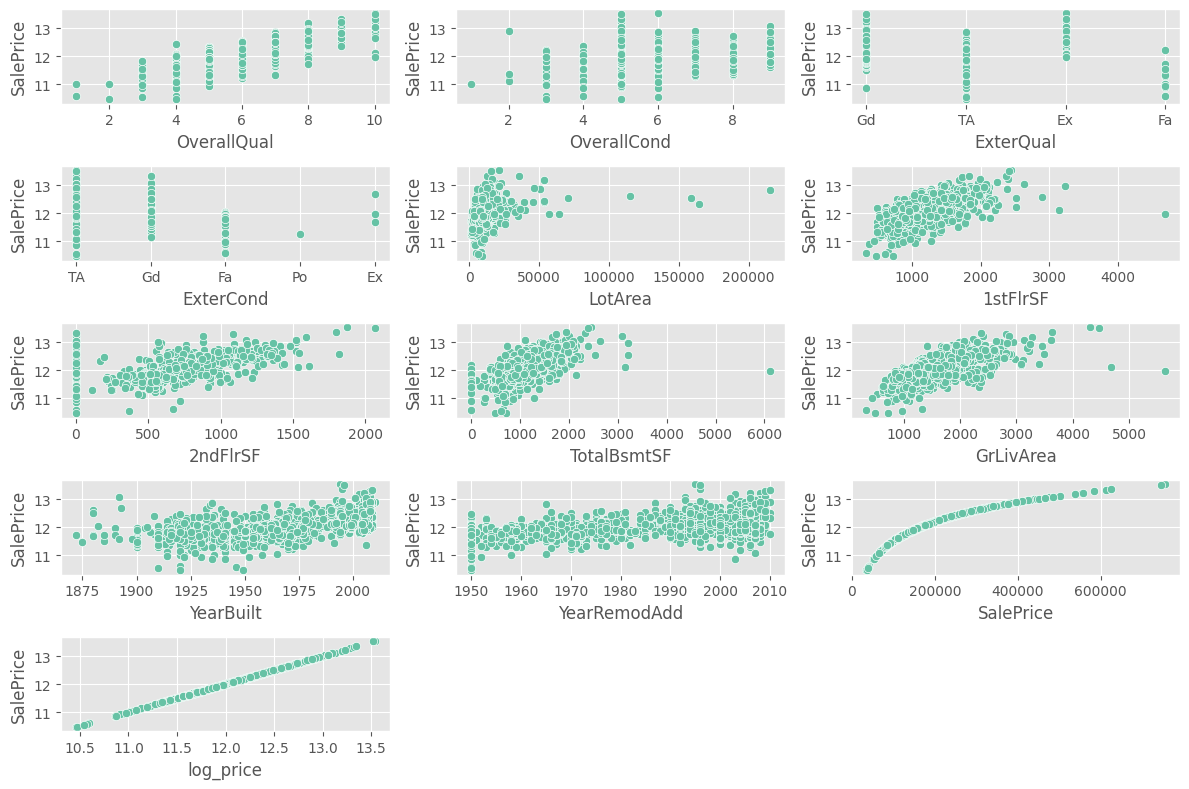

In [80]:
plt.figure(figsize=(12, 8))
for col in significant_cols:
    plt.subplot(5, 3, significant_cols.index(col)+1)
    sns.scatterplot(x=train[col], y=target_log)
plt.tight_layout()
plt.show()

###　1.1 所在地と価格の関係を調べる
- 立地ごとに価格の平均を集計
- 立地ごとに対数変換した価格の平均を合計

In [81]:
neighbor_price = train.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)
neighbor_price

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Gilbert    192854.506329
NWAmes     189050.068493
SawyerW    186555.796610
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
SWISU      142591.360000
Blueste    137500.000000
Sawyer     136793.135135
OldTown    128225.300885
Edwards    128219.700000
BrkSide    124834.051724
BrDale     104493.750000
IDOTRR     100123.783784
MeadowV     98576.470588
Name: SalePrice, dtype: float64

In [82]:
neighbor_log_price = train.groupby('Neighborhood')['log_price'].mean().sort_values(ascending=False)
neighbor_log_price

Neighborhood
NoRidge    12.676000
NridgHt    12.619411
StoneBr    12.585486
Timber     12.363455
Veenker    12.344176
Somerst    12.296495
ClearCr    12.239900
Crawfor    12.206659
Blmngtn    12.169416
CollgCr    12.163641
Gilbert    12.155803
NWAmes     12.130609
SawyerW    12.090689
Mitchel    11.933948
NAmes      11.868045
NPkVill    11.866477
SWISU      11.838435
Blueste    11.826536
Sawyer     11.811468
Edwards    11.712312
OldTown    11.703865
BrkSide    11.679727
BrDale     11.547864
MeadowV    11.474522
IDOTRR     11.446889
Name: log_price, dtype: float64

- 立地価格平均はmin-max法により係数化
- 対数立地価格平均は標準化により係数化

In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

neighbor_price_mmsclaled = mm_scaler.fit_transform(neighbor_price.values.reshape(-1, 1))
neighbor_price_dict = dict(zip(neighbor_price.index, neighbor_price_mmsclaled))
train['neighbor_price_mmscaled'] = train['Neighborhood'].map(neighbor_price_dict).astype(float)

neighbor_log_price_stdsclaled = std_scaler.fit_transform(neighbor_log_price.values.reshape(-1, 1))
neighbor_log_price_dict = dict(zip(neighbor_log_price.index, neighbor_log_price_stdsclaled))
train['neighbor_log_price_stdscaled'] = train['Neighborhood'].map(neighbor_log_price_dict).astype(float)


In [84]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_price,neighbor_price_mmscaled,neighbor_log_price_stdscaled
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2008,WD,Normal,208500,12.247694,0.419862,0.392477
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,0,5,2007,WD,Normal,181500,12.109011,0.592248,0.922961
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,0,9,2008,WD,Normal,223500,12.317167,0.419862,0.392477
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,2,2006,WD,Abnorml,140000,11.849398,0.473339,0.518880
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,0,12,2008,WD,Normal,250000,12.429216,1.000000,1.897994


### 1.2 関数化で順序尺度を用いている全てのカラムを係数化
なお、NaNがあるところは`NAN`文字列に変換

In [85]:
ordinal_cols = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 
                'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2',
                'HeatingQC', 'KitchenQual', 'FireplaceQu',
                'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
                'Fence', 'Functional']

# 欠損値を'NA'に変換
for col in ordinal_cols:
    if col in train.columns:
        train[col] = train[col].fillna('NA')

In [86]:
      
weight_dicts = {}

from utils import ordinal_to_weight

# 対数価格についての標準化係数を取得
for col in ordinal_cols:
    if col in train.columns:
        train, weight_dict = ordinal_to_weight(df=train, col_name=col, log_transform=True, scaler_type='standard')
        weight_dicts[col] = weight_dict
        print(f"{col} を重み付けしました。")
        
# 価格についてmin-max係数化
for col in ordinal_cols:
    if col in train.columns:
        train, weight_dict = ordinal_to_weight(df=train, col_name=col)
        weight_dicts[col] = weight_dict
        print(f"{col} を重み付けしました。")
train.head()
        


OverallQual を重み付けしました。
OverallCond を重み付けしました。
ExterQual を重み付けしました。
ExterCond を重み付けしました。
BsmtQual を重み付けしました。
BsmtCond を重み付けしました。
BsmtFinType1 を重み付けしました。
BsmtFinType2 を重み付けしました。
HeatingQC を重み付けしました。
KitchenQual を重み付けしました。
FireplaceQu を重み付けしました。
GarageFinish を重み付けしました。
GarageQual を重み付けしました。
GarageCond を重み付けしました。
PoolQC を重み付けしました。
Fence を重み付けしました。
Functional を重み付けしました。
OverallQual を重み付けしました。
OverallCond を重み付けしました。
ExterQual を重み付けしました。
ExterCond を重み付けしました。
BsmtQual を重み付けしました。
BsmtCond を重み付けしました。
BsmtFinType1 を重み付けしました。
BsmtFinType2 を重み付けしました。
HeatingQC を重み付けしました。
KitchenQual を重み付けしました。
FireplaceQu を重み付けしました。
GarageFinish を重み付けしました。
GarageQual を重み付けしました。
GarageCond を重み付けしました。
PoolQC を重み付けしました。
Fence を重み付けしました。
Functional を重み付けしました。


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,BsmtFinType2_weight,HeatingQC_weight,KitchenQual_weight,FireplaceQu_weight,GarageFinish_weight,GarageQual_weight,GarageCond_weight,PoolQC_weight,Fence_weight,Functional_weight
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.746501,1.000000,0.477829,0.055626,0.722209,0.620046,1.0,0.0,1.0,1.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.746501,1.000000,0.154255,0.365280,0.722209,0.620046,1.0,0.0,1.0,1.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.746501,1.000000,0.477829,0.365280,0.722209,0.620046,1.0,0.0,1.0,1.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.746501,0.546138,0.477829,0.464477,0.284046,0.620046,1.0,0.0,1.0,1.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.746501,1.000000,0.477829,0.365280,0.722209,0.620046,1.0,0.0,1.0,1.0


### 1.3 床面積を圧縮
まずは床面積関連の相関行列（ヒートマップ）を作成

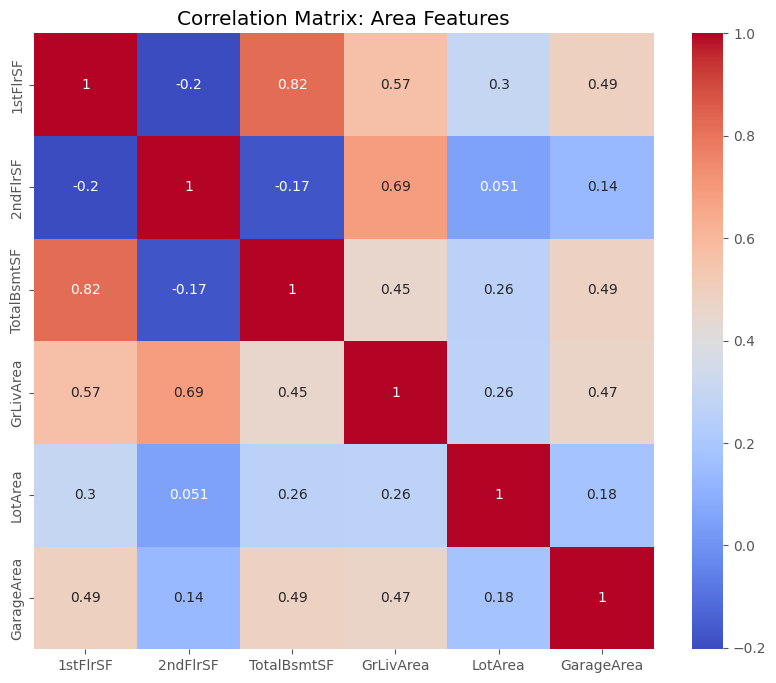

In [87]:
area_features = [
    '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF',
    'GrLivArea', 'LotArea', 'GarageArea'
]

# 相関行列のヒートマップ
plt.figure(figsize=(10, 8))
area_corr = train[area_features].corr()
sns.heatmap(area_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Area Features')
plt.savefig(os.path.join(IMAGE_PATH, '02_corr_flr.png'))
plt.show()

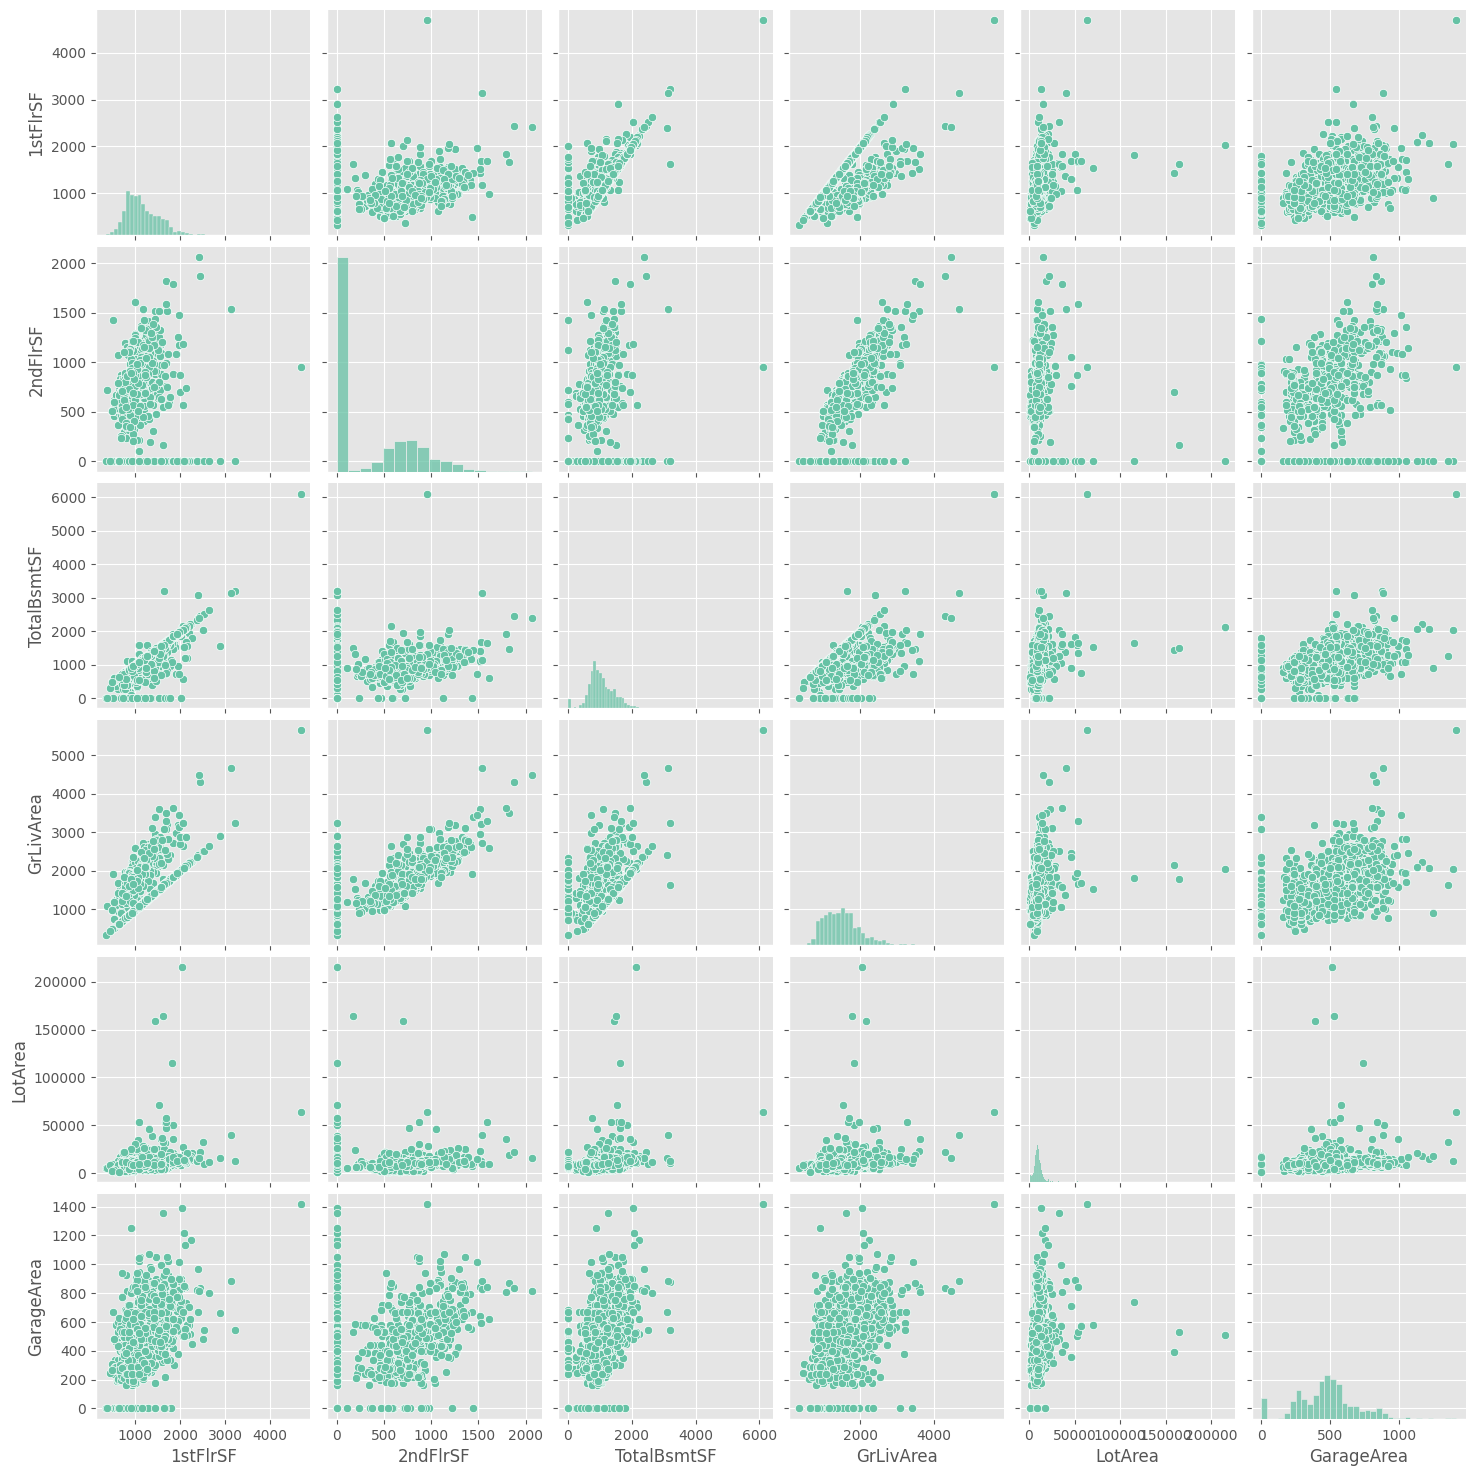

In [88]:
sns.pairplot(train[area_features])
plt.savefig(os.path.join(IMAGE_PATH, '03_area_pairplot.png'))
plt.show()

### 1.4 床面積系はまとめたり、フラグを設定したり、対数変換していく

In [89]:
# フロア面積を足す
train['total_sf'] = train['1stFlrSF'] + train['2ndFlrSF'].fillna(0) + train['TotalBsmtSF'].fillna(0)


In [90]:
# フラグ設定
train['has_2nd'] = (train['2ndFlrSF'] > 0).astype(int)

train['has_bsmt'] = (train['TotalBsmtSF'] > 0).astype(int)

train['has_garage'] = (train['GarageArea'] > 0).astype(int)

train['has_pool'] = (train['PoolArea'] > 0).astype(int)

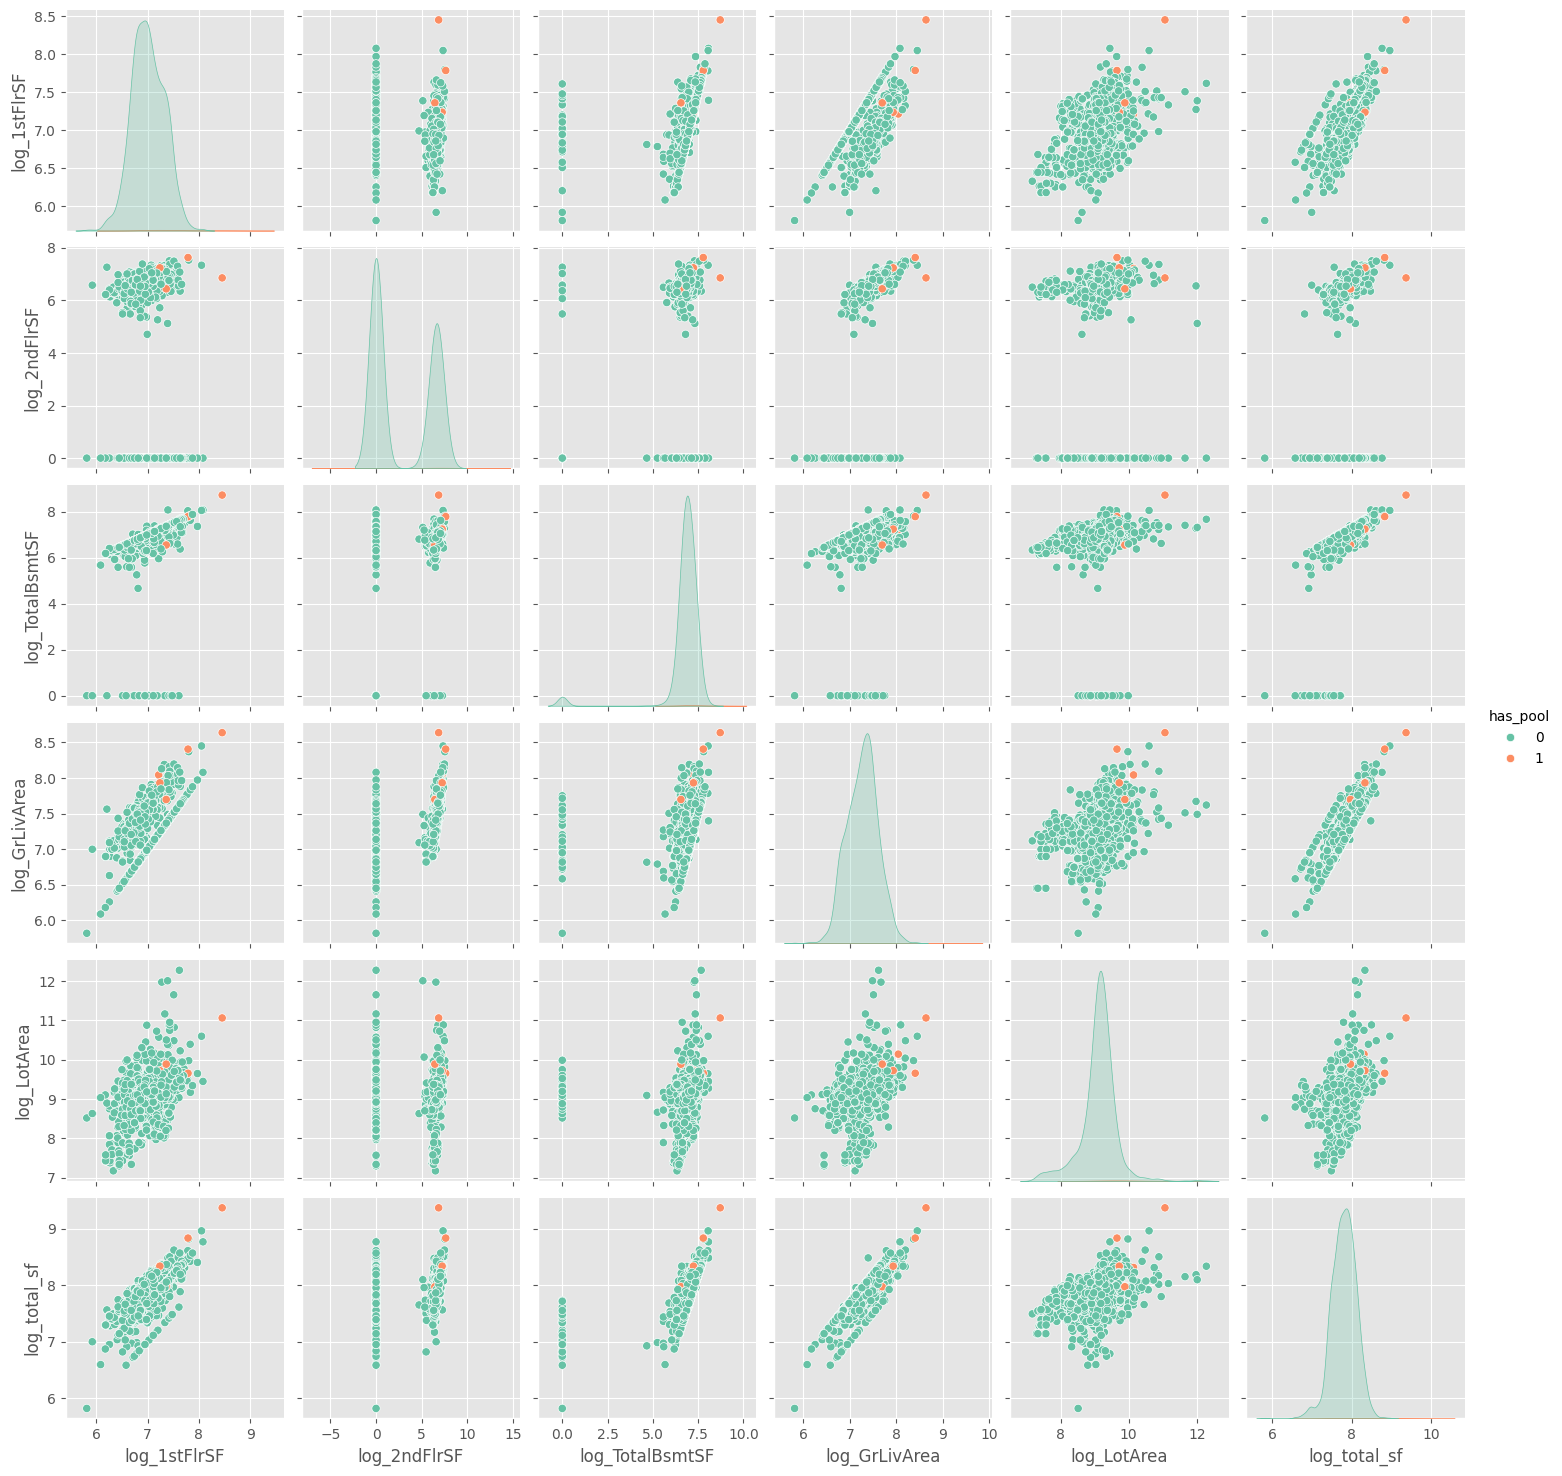

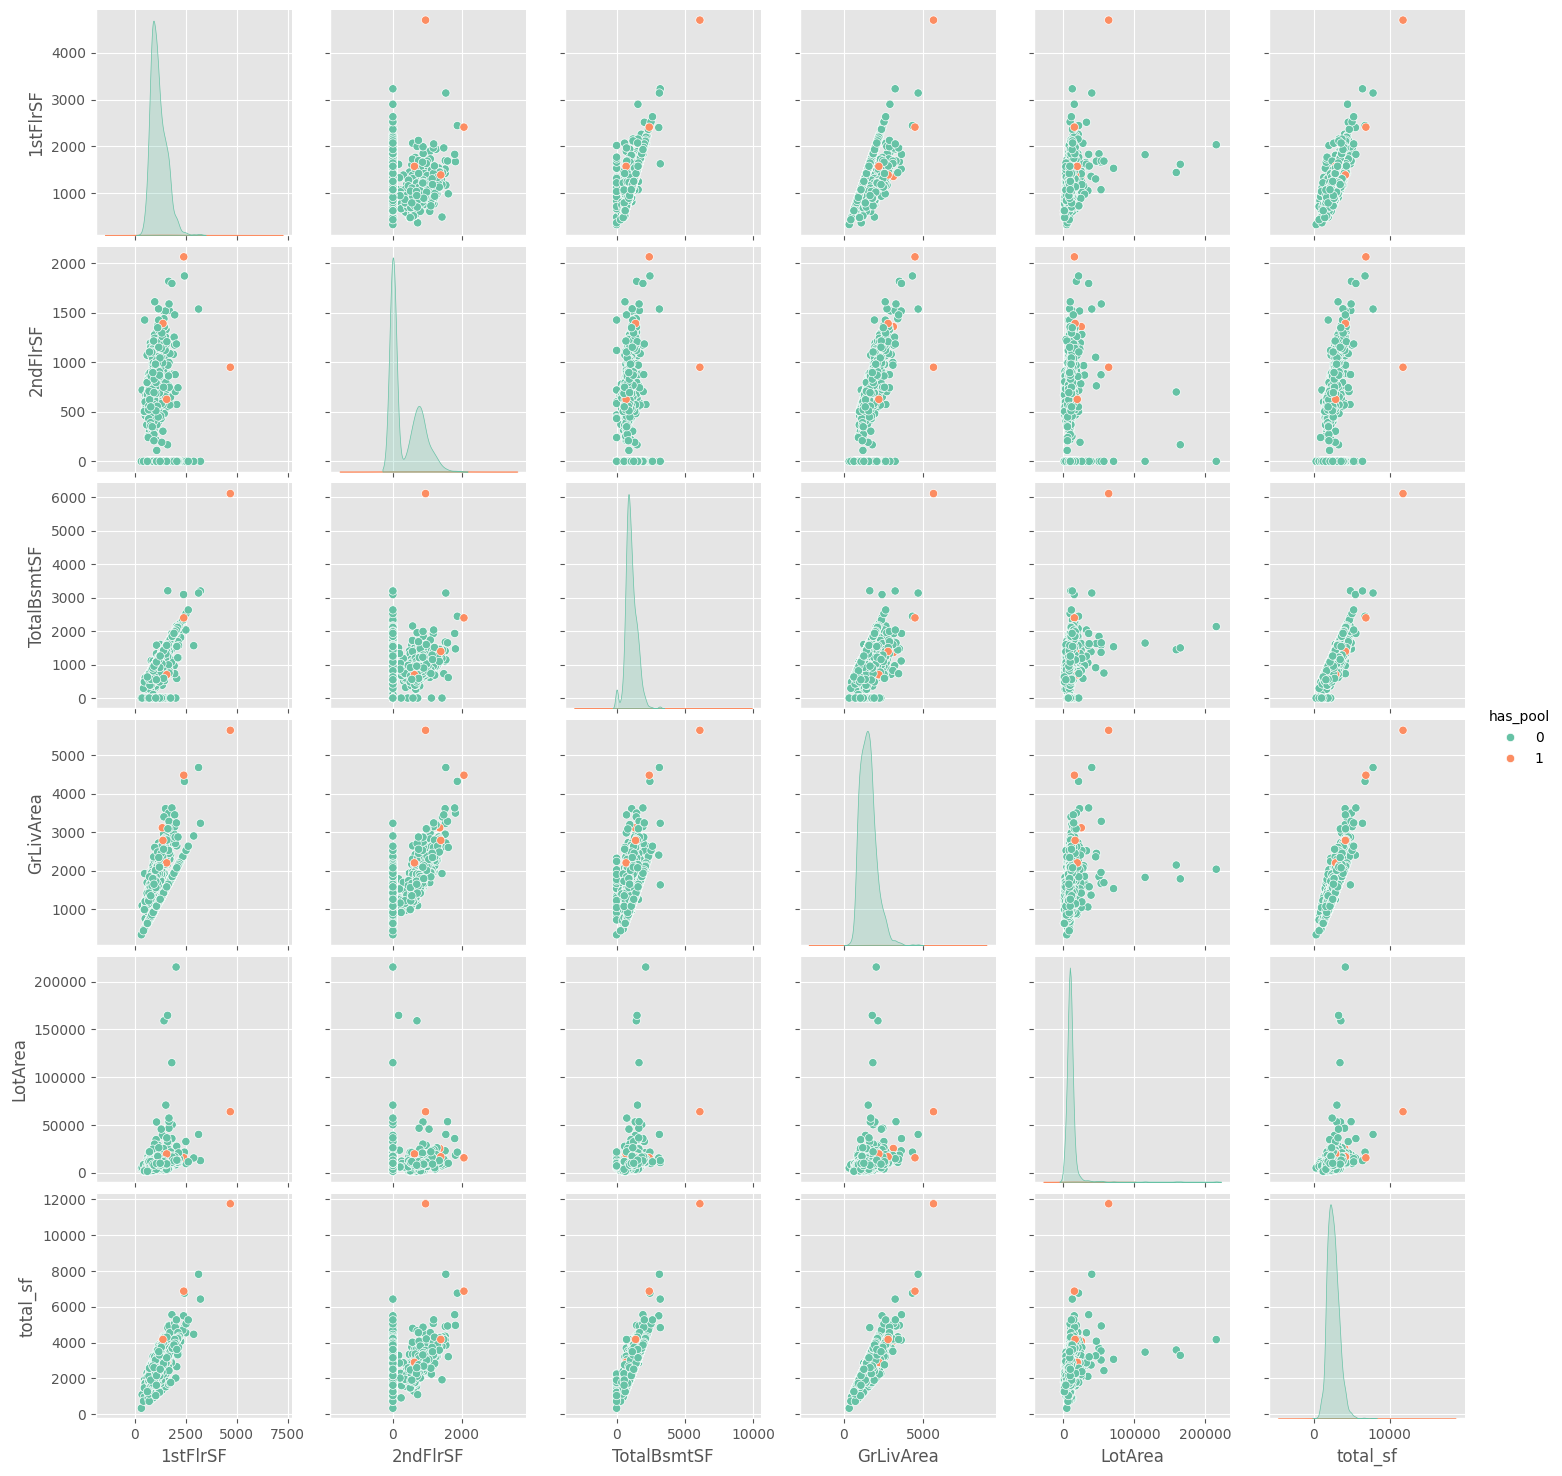

In [91]:
floor_features = [
    '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF',
    'GrLivArea', 'LotArea', 'total_sf'
]
for col in floor_features:
    train['log_' + col] = np.log(train[col]+1)


sns.pairplot(train, vars=['log_' + col for col in floor_features], diag_kind='kde', hue='has_pool')
# plt.savefig(os.path.join(IMAGE_PATH, '03_area_pairplot.png'))
plt.show()

sns.pairplot(train, vars=floor_features, diag_kind='kde', hue='has_pool')
plt.show()


### 1.5 古さの指標を作成
#### 販売時の築年数、リフォームまでの経過年

In [92]:
# 販売年 - 建築年
train['house_age'] = train['YrSold'] - train['YearBuilt']

# 販売年 - 改築年
train['remod_age'] = train['YrSold'] - train['YearRemodAdd']


#### リフォームの有無を設定

In [93]:

# リフォームまでの経過年
train['yrs_before_remod'] = train['YearRemodAdd'] - train['YearBuilt']

# 改築の有無
train['is_remodeled'] = (train['remod_age'] > train['YearBuilt']).astype(int)

#### 築年代ごとのカテゴリを作成

In [94]:

from utils import freq_dist

In [95]:
year_freq = freq_dist(train['YearBuilt'], class_width=10)
year_freq.iloc[187:]

,階級値,度数,累積度数,相対度数,累積相対度数
階級,,,,,
1870以上1880未満,1875.0,2,2,0.001370,0.001370
1880以上1890未満,1885.0,7,9,0.004795,0.006164
1890以上1900未満,1895.0,6,15,0.004110,0.010274
1900以上1910未満,1905.0,15,30,0.010274,0.020548
1910以上1920未満,1915.0,58,88,0.039726,0.060274
1920以上1930未満,1925.0,97,185,0.066438,0.126712
1930以上1940未満,1935.0,54,239,0.036986,0.163699
1940以上1950未満,1945.0,79,318,0.054110,0.217808
1950以上1960未満,1955.0,167,485,0.114384,0.332192


In [96]:
train['built_era'] = pd.cut(
    train['YearBuilt'],
    bins=[1800, 1900, 1940, 1960, 1980, 2000, 2020],
    labels=['pre_1900', '1900-1940', '40-60', '60-80', '80-2000', 'post-2000']
)

In [97]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,log_2ndFlrSF,log_TotalBsmtSF,log_GrLivArea,log_LotArea,log_total_sf,house_age,remod_age,yrs_before_remod,is_remodeled,built_era
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,6.751101,6.753438,7.444833,9.042040,7.850493,5,5,0,0,post-2000
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.000000,7.141245,7.141245,9.169623,7.833996,31,31,0,0,60-80
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,6.765039,6.825460,7.488294,9.328212,7.903596,7,6,1,0,post-2000
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,6.629363,6.629363,7.448916,9.164401,7.813592,91,36,55,0,1900-1940
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,6.960348,7.044033,7.695758,9.565284,8.114923,8,8,0,0,80-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,6.543912,6.860664,7.407318,8.976894,7.863651,8,7,1,0,80-2000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.000000,7.341484,7.637234,9.486152,8.193124,32,22,10,0,60-80
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,7.050123,7.050123,7.758333,9.109746,8.158516,69,4,65,0,40-60


In [98]:
year_price = train.groupby('YearBuilt')['SalePrice'].mean()
year_price = year_price.rolling(window=5, center=True).mean()
year_price = year_price.interpolate(method='linear')
year_price = year_price.fillna(train.groupby('YearBuilt')['SalePrice'].mean())
year_price

YearBuilt
1872    122000.000000
1875     94000.000000
1880    139173.950000
1882    143213.950000
1885    182663.950000
            ...      
2006    259203.197647
2007    270977.653203
2008    303927.862578
2009    303927.862578
2010    303927.862578
Name: SalePrice, Length: 112, dtype: float64

In [64]:
train['year_price'] = train['YearBuilt'].map(year_price)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,log_TotalBsmtSF,log_GrLivArea,log_LotArea,log_total_sf,house_age,remod_age,yrs_before_remod,is_remodeled,built_era,year_price
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,6.753438,7.444833,9.042040,7.850493,5,5,0,0,00-10,227387.363668
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,7.141245,7.141245,9.169623,7.833996,31,31,0,0,70-90,166794.831439
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,6.825460,7.488294,9.328212,7.903596,7,6,1,0,00-10,223657.905932
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,6.629363,7.448916,9.164401,7.813592,91,36,55,0,1900-1950,124018.557143
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,7.044033,7.695758,9.565284,8.114923,8,8,0,0,90-2000,222266.190377
